In [134]:
import numpy as np 
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
for dirname, _, filenames in os.walk('/Users/user/AppData/Local/Programs/Python/Python39/Scripts/AB_NYC_2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [136]:
filePath = "/Users/user/Desktop/airbnb/AB_NYC_2019.csv"
nyAirbnbSchema = spark.read.csv(filePath, header=True, multiLine=True, inferSchema=True, quote='"', escape='"')

In [137]:
nyAirbnbSchema.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



In [138]:
print("Number of rows/records : ", nyAirbnbSchema.count())

Number of rows/records :  48895


In [139]:
print("Number of null values for each attribute :")
for col in nyAirbnbSchema.columns:
    print(col, ": ", nyAirbnbSchema.where(nyAirbnbSchema[col].isNull()).count())

Number of null values for each attribute :
id :  0
name :  16
host_id :  0
host_name :  21
neighbourhood_group :  0
neighbourhood :  0
latitude :  0
longitude :  0
room_type :  0
price :  0
minimum_nights :  0
number_of_reviews :  0
last_review :  10052
reviews_per_month :  10052
calculated_host_listings_count :  0
availability_365 :  0


In [140]:
nyAirbnbSchema = nyAirbnbSchema.drop("id", "host_name","last_review")
print(nyAirbnbSchema)

DataFrame[name: string, host_id: int, neighbourhood_group: string, neighbourhood: string, latitude: double, longitude: double, room_type: string, price: int, minimum_nights: int, number_of_reviews: int, reviews_per_month: double, calculated_host_listings_count: int, availability_365: int]


In [141]:
nyAirbnbSchema = nyAirbnbSchema.na.fill(0, ["reviews_per_month"])
print(nyAirbnbSchema)

DataFrame[name: string, host_id: int, neighbourhood_group: string, neighbourhood: string, latitude: double, longitude: double, room_type: string, price: int, minimum_nights: int, number_of_reviews: int, reviews_per_month: double, calculated_host_listings_count: int, availability_365: int]


In [142]:
print("Number of null values for each attribute after cleaning :")
for col in nyAirbnbSchema.columns:
    print(col, ": ", nyAirbnbSchema.where(nyAirbnbSchema[col].isNull()).count())

Number of null values for each attribute after cleaning :
name :  16
host_id :  0
neighbourhood_group :  0
neighbourhood :  0
latitude :  0
longitude :  0
room_type :  0
price :  0
minimum_nights :  0
number_of_reviews :  0
reviews_per_month :  0
calculated_host_listings_count :  0
availability_365 :  0


In [143]:
nyAirbnbSchema.printSchema()

root
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- reviews_per_month: double (nullable = false)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



In [144]:
nyAirbnbSchema.select("name").distinct().count()

47906

In [145]:
nyAirbnbSchema.select("neighbourhood_group").distinct().count()

5

In [146]:
neighbourhood_group_count = nyAirbnbSchema.groupby("neighbourhood_group").count().toPandas().head()
neighbourhood_group_count

,neighbourhood_group,count
0,Queens,5666
1,Brooklyn,20104
2,Staten Island,373
3,Manhattan,21661
4,Bronx,1091


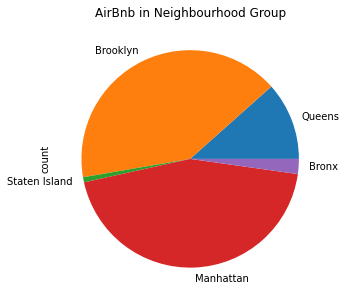

In [147]:
neighbourhood_group_count.index = neighbourhood_group_count['neighbourhood_group']
plotPie = neighbourhood_group_count.plot.pie(y='count',
                                             legend = False, 
                                             title='AirBnb in Neighbourhood Group', figsize=(10,5))


In [148]:
neighbourhood_group_avgPrice = nyAirbnbSchema.groupBy("neighbourhood_group").agg(func.mean("price").alias("avg_price")).toPandas().head()
neighbourhood_group_avgPrice

,neighbourhood_group,avg_price
0,Queens,99.517649
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Manhattan,196.875814
4,Bronx,87.496792


<AxesSubplot:xlabel='neighbourhood_group', ylabel='avg_price'>

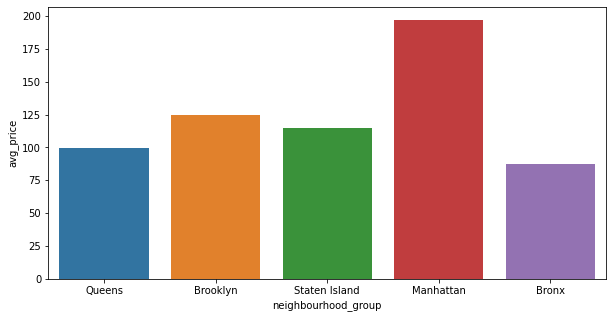

In [149]:
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="avg_price", data=neighbourhood_group_avgPrice)

In [150]:
neighbourhood_count = nyAirbnbSchema.groupby("neighbourhood").count().orderBy('count', ascending=False).toPandas().head(15)
neighbourhood_count

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

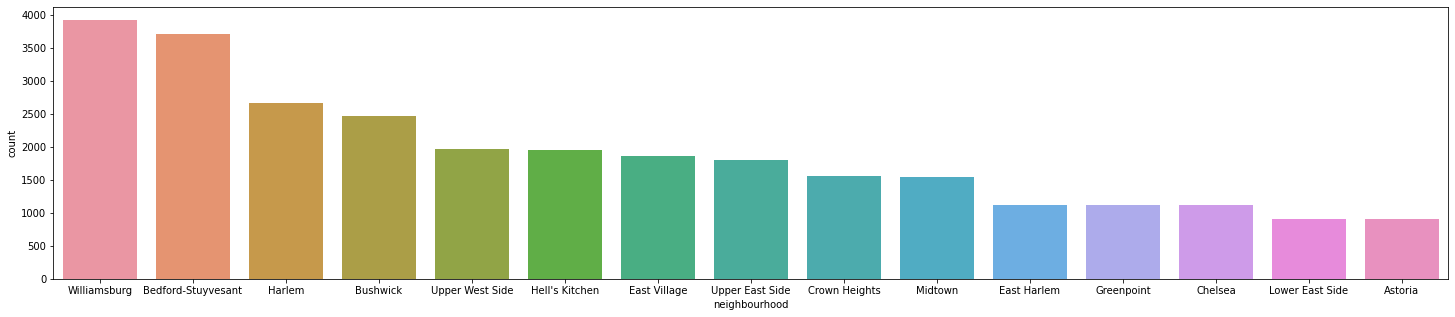

In [151]:
plt.figure(figsize=(25, 5))
sns.barplot(x="neighbourhood", y="count", data=neighbourhood_count)

In [152]:
neighbourhood_avgPrice = nyAirbnbSchema.groupBy("neighbourhood").agg(func.mean("price").alias("avg_price")).toPandas().head(15)
neighbourhood_avgPrice

,neighbourhood,avg_price
0,Corona,59.171875
1,Richmondtown,78.000000
2,Prince's Bay,409.500000
3,Westerleigh,71.500000
4,Mill Basin,179.750000
5,Civic Center,191.942308
6,Douglaston,82.750000
7,Mount Hope,77.500000
8,Marble Hill,89.166667
9,Rego Park,83.877358


<AxesSubplot:xlabel='neighbourhood', ylabel='avg_price'>

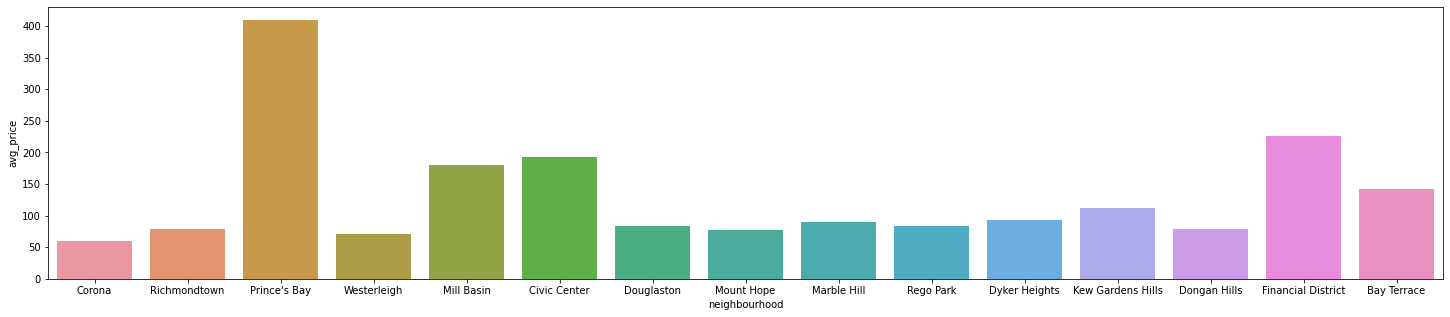

In [153]:
plt.figure(figsize=(25, 5))
sns.barplot(x="neighbourhood", y="avg_price", data=neighbourhood_avgPrice)

In [154]:
host_id_count = nyAirbnbSchema.groupby("host_id").count().orderBy('count', ascending=False).toPandas().head(15)
host_id_count

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


<AxesSubplot:xlabel='host_id', ylabel='count'>

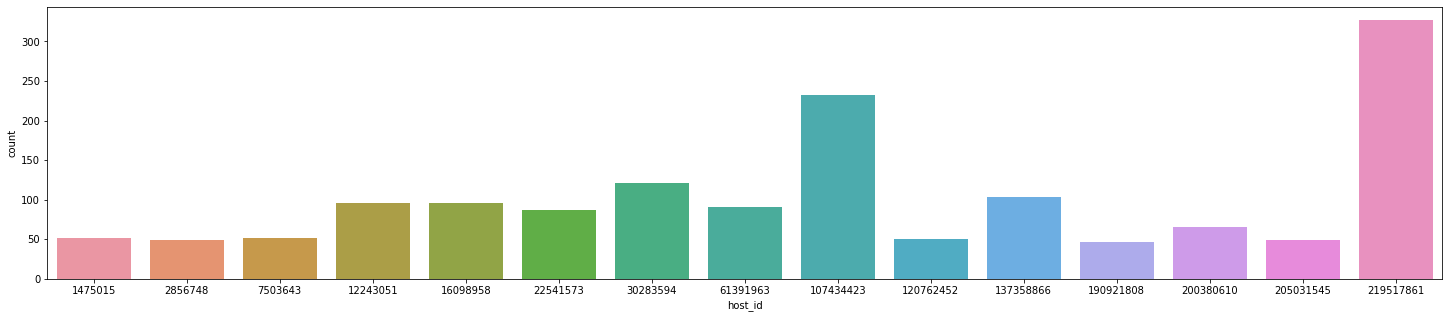

In [155]:
plt.figure(figsize=(25, 5))
sns.barplot(x="host_id", y="count", data=host_id_count)

In [156]:
room_type_count = nyAirbnbSchema.where(nyAirbnbSchema.room_type.isin("Entire home/apt","Private room","Shared room")).groupBy(nyAirbnbSchema["room_type"]).count().orderBy('count', ascending=False).toPandas()
room_type_count

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


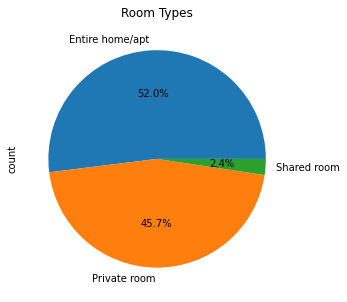

In [157]:
room_type_count.index = room_type_count['room_type']
plotPie = room_type_count.plot.pie(y='count', autopct='%1.1f%%', legend = False, 
                                   title='Room Types', figsize=(10,5))


In [158]:
room_avgPrice = nyAirbnbSchema.agg(func.mean("price").alias("avg_price")).toPandas()
room_avgPrice

,avg_price
0,152.720687


In [159]:
neighGrp_roomtype = nyAirbnbSchema.select(nyAirbnbSchema["neighbourhood_group"], nyAirbnbSchema["room_type"]).groupBy("neighbourhood_group", "room_type").count().orderBy('neighbourhood_group', ascending=True).toPandas()
neighGrp_roomtype

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,379
1,Bronx,Shared room,60
2,Bronx,Private room,652
3,Brooklyn,Private room,10132
4,Brooklyn,Entire home/apt,9559
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Shared room,198


<AxesSubplot:xlabel='neighbourhood_group'>

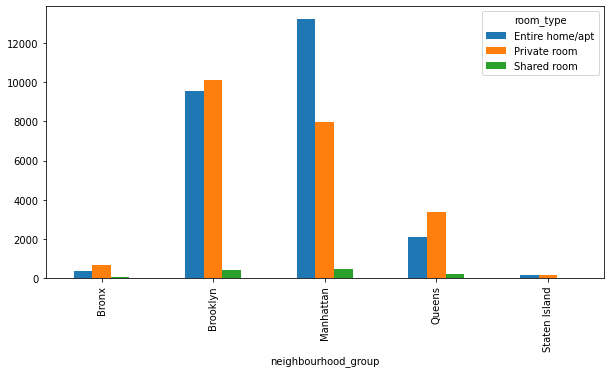

In [160]:
pd.pivot_table(neighGrp_roomtype, index='neighbourhood_group', columns='room_type', 
               values='count').plot.bar(figsize=(10,5))


In [161]:
min_night_count = nyAirbnbSchema.groupby("minimum_nights").count().orderBy('count', ascending=False).toPandas().head(15)
min_night_count

,minimum_nights,count
0,1,12720
1,2,11696
2,3,7999
3,30,3760
4,4,3303
5,5,3034
6,7,2058
7,6,752
8,14,562
9,10,483


<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

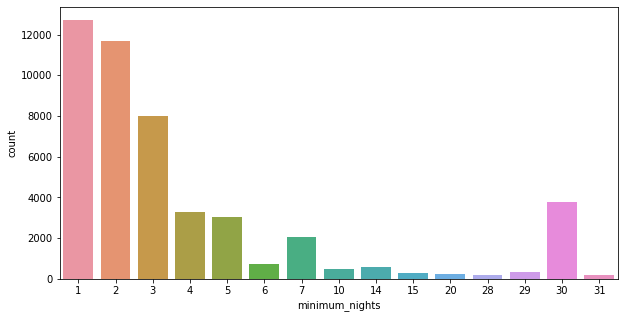

In [162]:
plt.figure(figsize=(10, 5))
sns.barplot(x="minimum_nights", y="count", data=min_night_count)

In [163]:
num_reviews_avgPrice = nyAirbnbSchema.groupBy("number_of_reviews").agg(func.mean("price").alias("avg_price")).orderBy('number_of_reviews', ascending=False).toPandas().head(15)
num_reviews_avgPrice

,number_of_reviews,avg_price
0,629,47.0
1,607,49.0
2,597,49.0
3,594,49.0
4,576,47.0
5,543,46.0
6,540,99.0
7,510,48.0
8,488,160.0
9,480,60.0


<AxesSubplot:xlabel='number_of_reviews', ylabel='avg_price'>

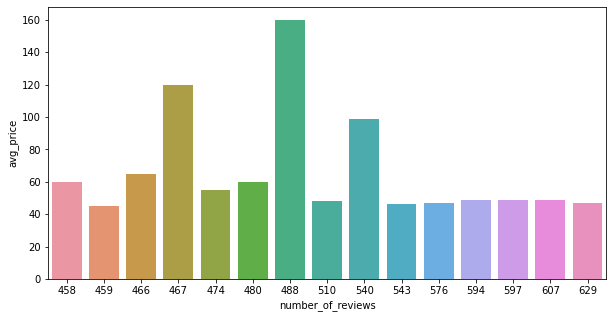

In [164]:
plt.figure(figsize=(10, 5))
sns.barplot(x="number_of_reviews", y="avg_price", data=num_reviews_avgPrice)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

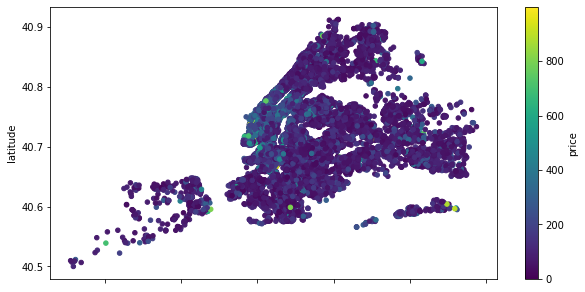

In [165]:
nyAirbnbSchema_plot = nyAirbnbSchema.toPandas()
nyAirbnbSchema_plot_trim = nyAirbnbSchema_plot[nyAirbnbSchema_plot['price'] < 1000]
nyAirbnbSchema_plot_trim.plot.scatter(x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('viridis'), figsize=(10,5))
